# Do you want to know why you lose hair?

## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

#### Data contains information on persons in this survey. Each row represents one person.
- "Id" - A unique identifier for each person.
- "Genetics" - Whether the person has a family history of baldness.
- "Hormonal Changes" - Indicates whether the individual has experienced hormonal changes (Yes/No).
- "Medical Conditions" - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- "Medications & Treatments" - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- "Nutritional Deficiencies" - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- "Stress" - Indicates the stress level of the individual (Low/Moderate/High).
- "Age" - Represents the age of the individual.
- "Poor Hair Care Habits" - Indicates whether the individual practices poor hair care habits (Yes/No).
- "Environmental Factors" - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- "Smoking" - Indicates whether the individual smokes (Yes/No).
- "Weight Loss" - Indicates whether the individual has experienced significant weight loss (Yes/No).
- "Hair Loss" - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

# Problem statement
In order to know a certain factor cause hairloss, the factor shows significant weighing influence.I believe multivariate linear regression with regularizations can be useful. Using causal inference based regression can help if being male or female has causation too. We will explore more on this later. 

But First, it is important to properly view data: things to explore beforehand: 
    
1. NA values in each columns
2. Range of values and if there is anamoly. I mean what if the values of gender column is 20? 
3. Are the categorical columns in equal proportion ?
4. Are the regression values in normal distribution?

These four things can provide clear picture whether the data is ready to be explored. 

In [97]:
# Import all required libraries
import random
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Import numpy for the np.exp function
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from random import randint
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [98]:
# Clean the whitespaces in the column names if exists
data.columns = data.columns.str.strip()
data.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss'],
      dtype='object')

In [99]:
# Change all values in data to binary Yes and No and sum individual columns to detect if NA exists
column_sums = data.isna().sum(skipna=False)
print(column_sums)

Id                          0
Genetics                    0
Hormonal Changes            0
Medical Conditions          0
Medications & Treatments    0
Nutritional Deficiencies    0
Stress                      0
Age                         0
Poor Hair Care Habits       0
Environmental Factors       0
Smoking                     0
Weight Loss                 0
Hair Loss                   0
dtype: int64


All columns sums to zero, so none of the columns have NA values.

In [100]:
# Test maxumum values in numeric columns to see if positive outliers exists
max_ranges = data.select_dtypes(include='number').agg(lambda x: x.max())
print(max_ranges)

Id           199949
Age              50
Hair Loss         1
dtype: int64


In [101]:
# Test minimum values in numeric columns to see if positive outliers exists
min_ranges = data.select_dtypes(include='number').agg(lambda x: x.min())
print(min_ranges)

Id           110003
Age              18
Hair Loss         0
dtype: int64


In [102]:
# Print unique values from each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")  # Separate each column's output with a new line

Unique values in 'Id':
[133992 148393 155074 118261 111915 139661 169255 112032 140785 187999
 118858 159158 156086 178256 150154 130552 116190 194441 147404 136709
 187362 133804 148974 116818 142062 147833 190967 114579 159949 117296
 139857 133091 157912 144334 136948 177638 158783 164570 132733 178632
 116434 173043 112613 111169 125738 187509 154811 167156 150641 147982
 137086 141739 121914 147047 122584 123906 138992 179680 192566 110488
 142694 113790 172772 110727 168306 174267 124384 196819 143895 178213
 128455 180864 178939 194055 176759 192870 159164 194962 199428 124749
 138548 166682 123676 189612 176953 173202 114166 185347 164602 196847
 190313 195235 118325 150587 199900 142431 133437 120699 187633 125204
 168967 147074 179153 118171 139016 124253 151443 116182 154980 180856
 114564 155613 176266 169244 149266 129605 157538 140772 172639 116356
 119044 194617 160472 116483 125476 191118 150786 169462 176009 152804
 188581 127051 149333 142915 135476 191636 145250 1509

The "No Data" values in the two columns " Medications & Treatments" AND "Medical Condition" is of concern.

In [103]:
# Print unique values from the 'Medical Conditions' and 'Treatment' columns
unique_conditions = data['Medical Conditions'].unique()
unique_treatments = data['Medications & Treatments'].unique()

print(unique_conditions)
print(unique_treatments)

['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']


Based on domain knowledge, the "No Data" probably represents other forms of medical conditions for `Medical Condition` column, and same for the `Medications & Treatments`column respectively.So, it's wiser to replace 'No Data' with "Other".

In [104]:
# Replace 'No Data' with 'Other' in specified columns
data["Medical Conditions"] = data["Medical Conditions"].replace('No Data', 'Other')
data["Medications & Treatments"] = data["Medications & Treatments"].replace('No Data', 'Other')

# Print the output and check if the value changed occured
print(data['Medical Conditions'].unique())
print(data['Medications & Treatments'].unique())

['Other' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']
['Other' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']


Test the proportion of the outcome variable 'Hair Loss'. The datasets should have equal number of 1's and 0's to have unbiased prediction. This informations is important because disproportionte proportion can skew dataset to favor specific outcome.

In [105]:
# Count of the propotion of each columns
proportions_hair_loss = data["Hair Loss"].value_counts(normalize=False)
print(proportions_hair_loss)

Hair Loss
0    502
1    497
Name: count, dtype: int64


The proportion is excellent, with dataset containing almost equal values of both 1's and 0's. 

Besides outcome variables, the predictor variables should also have similar proportion. The following lines runs the frequency plot functions for every categorical columns from the dataset.

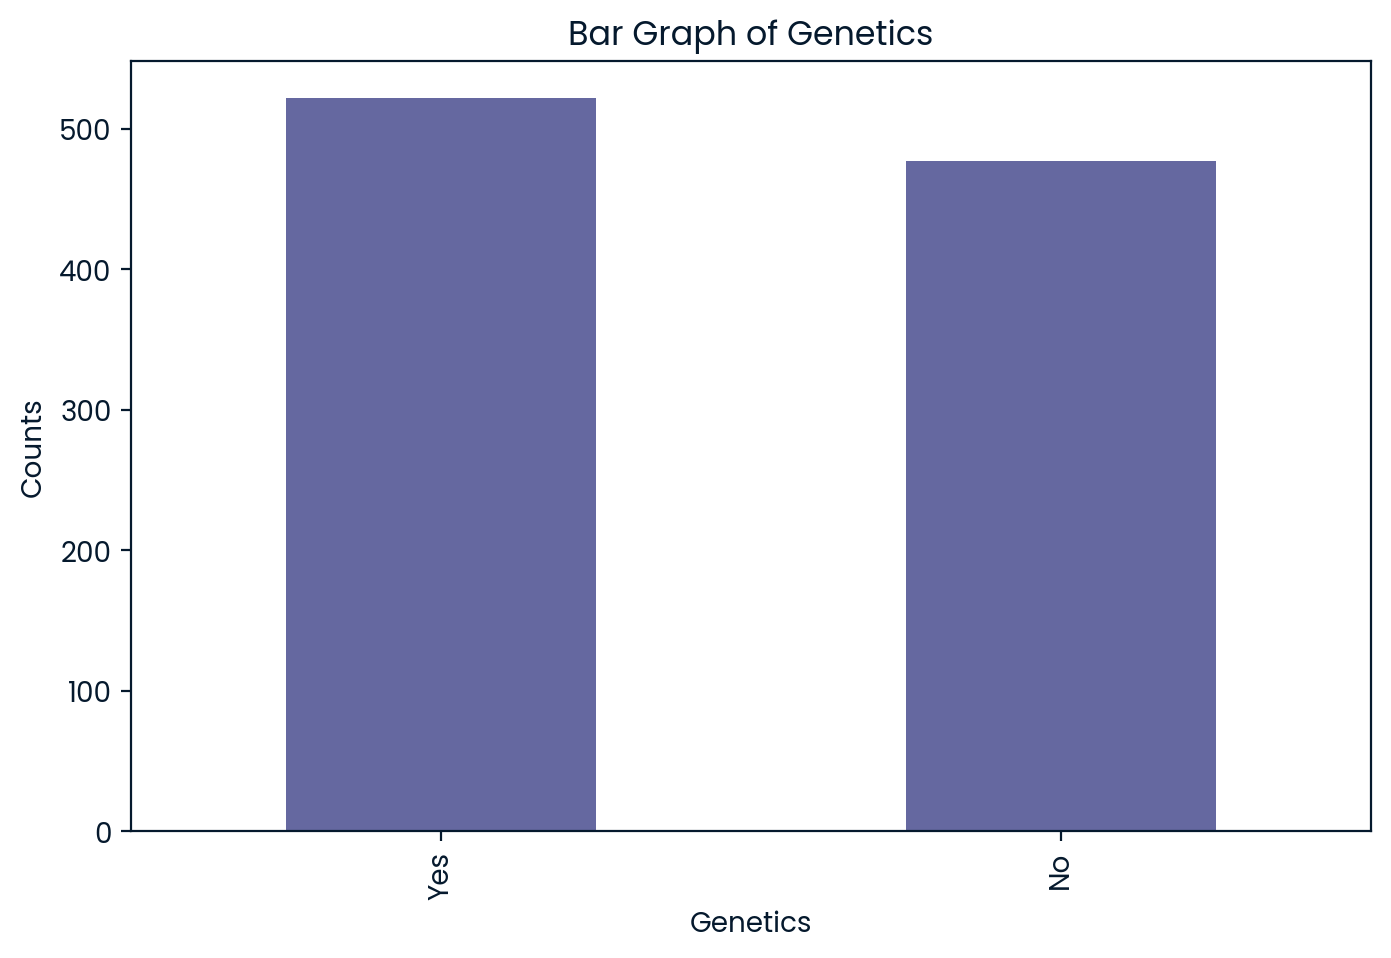

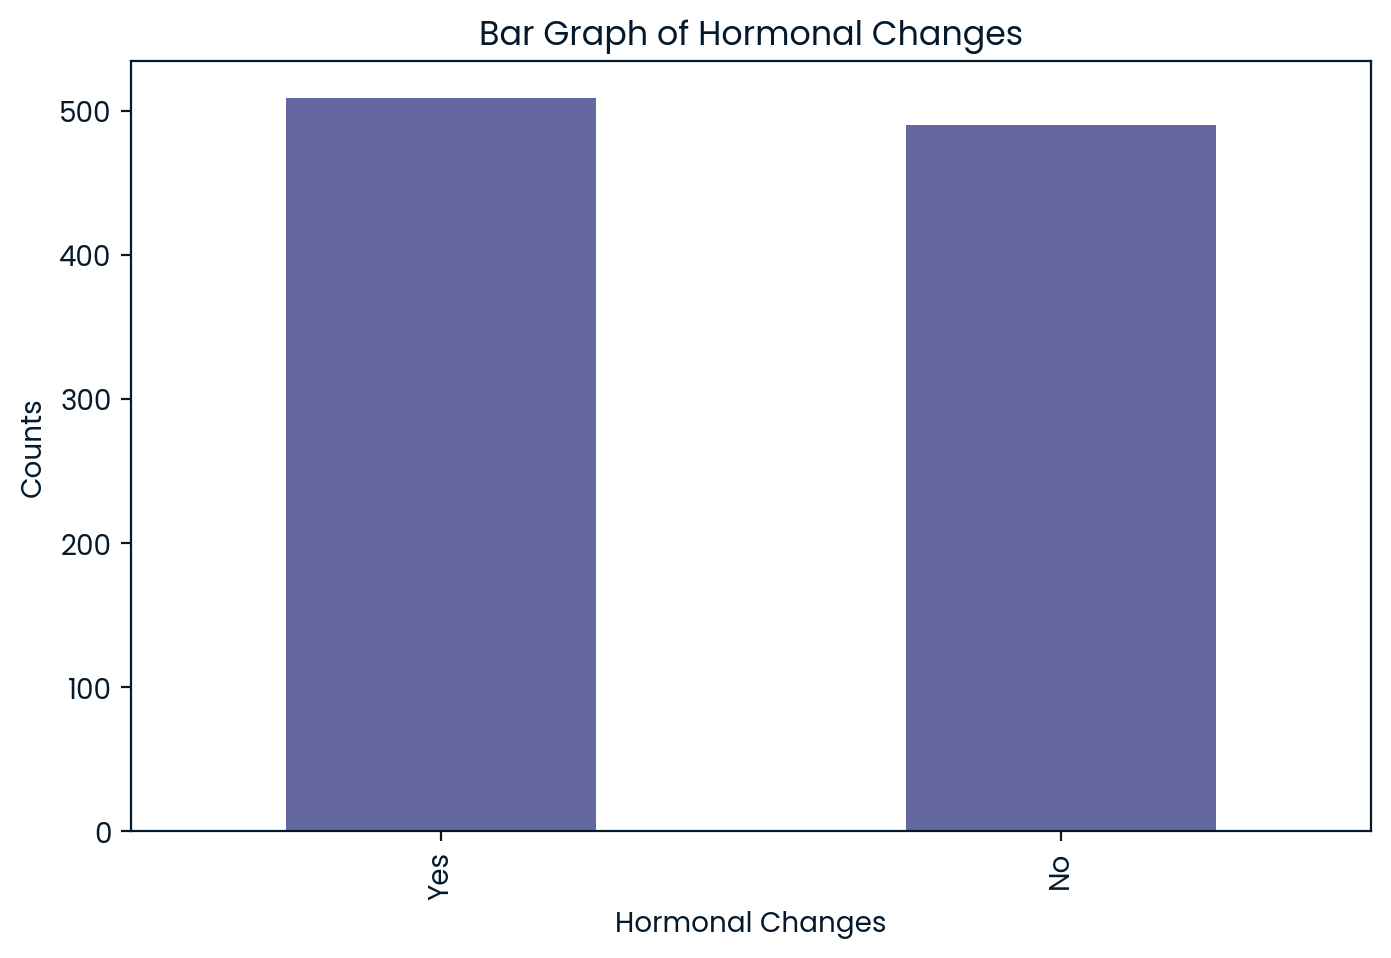

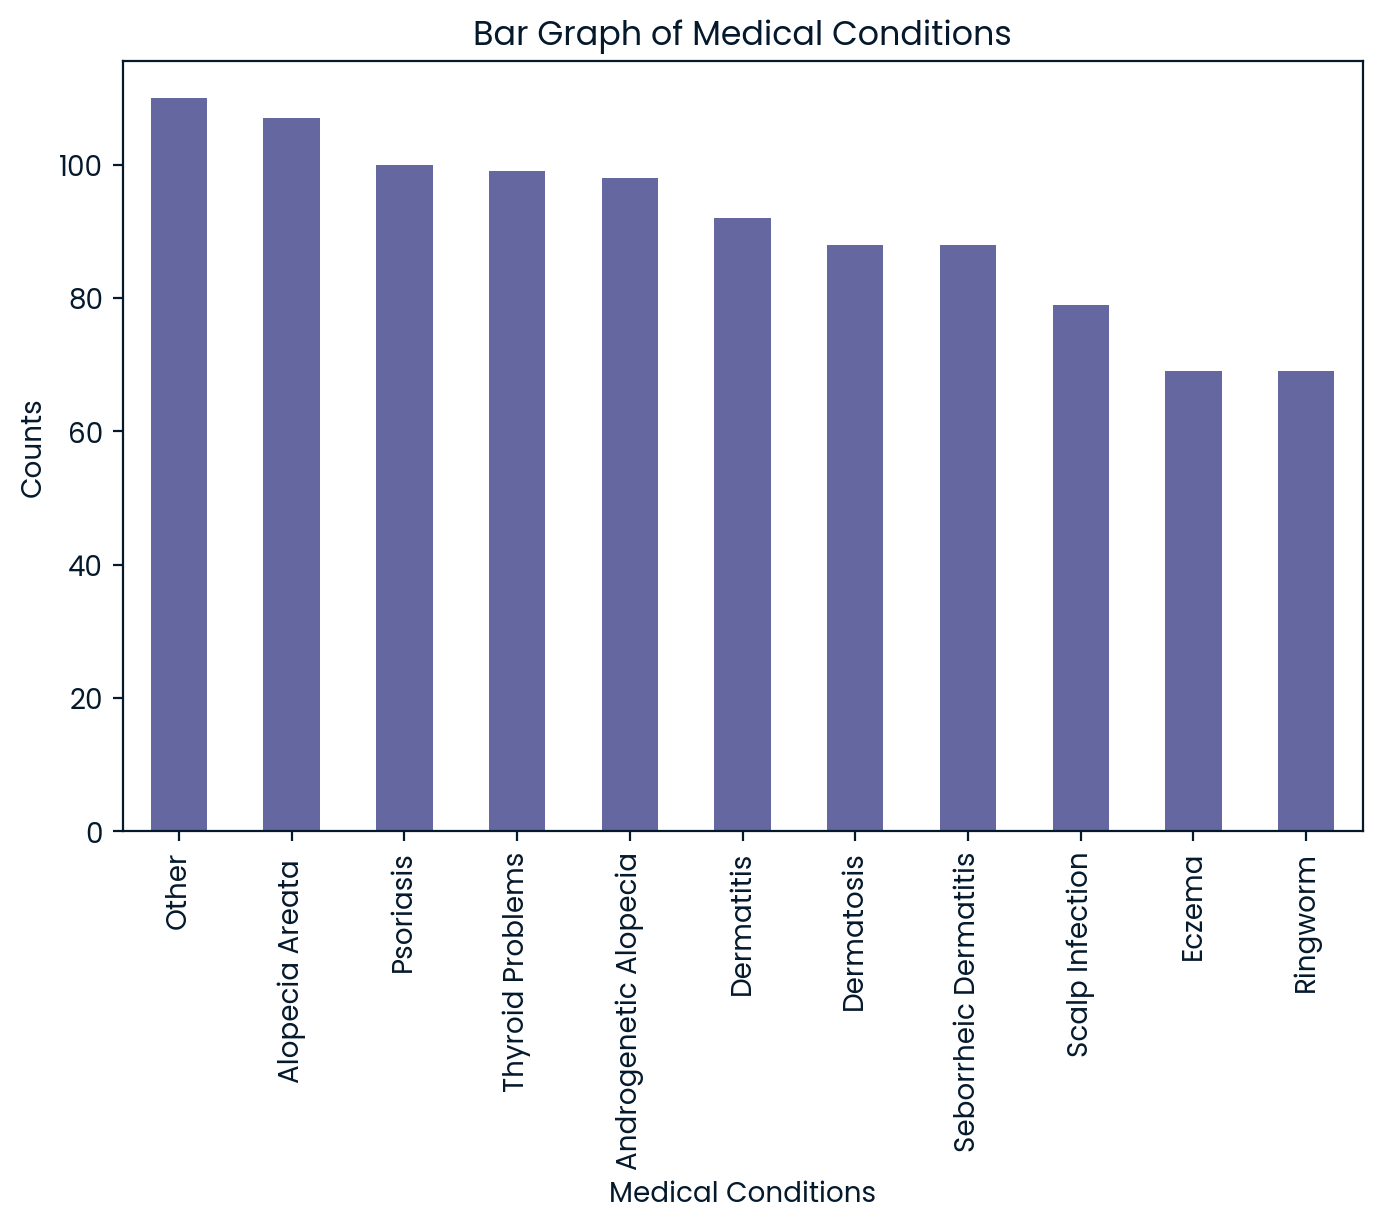

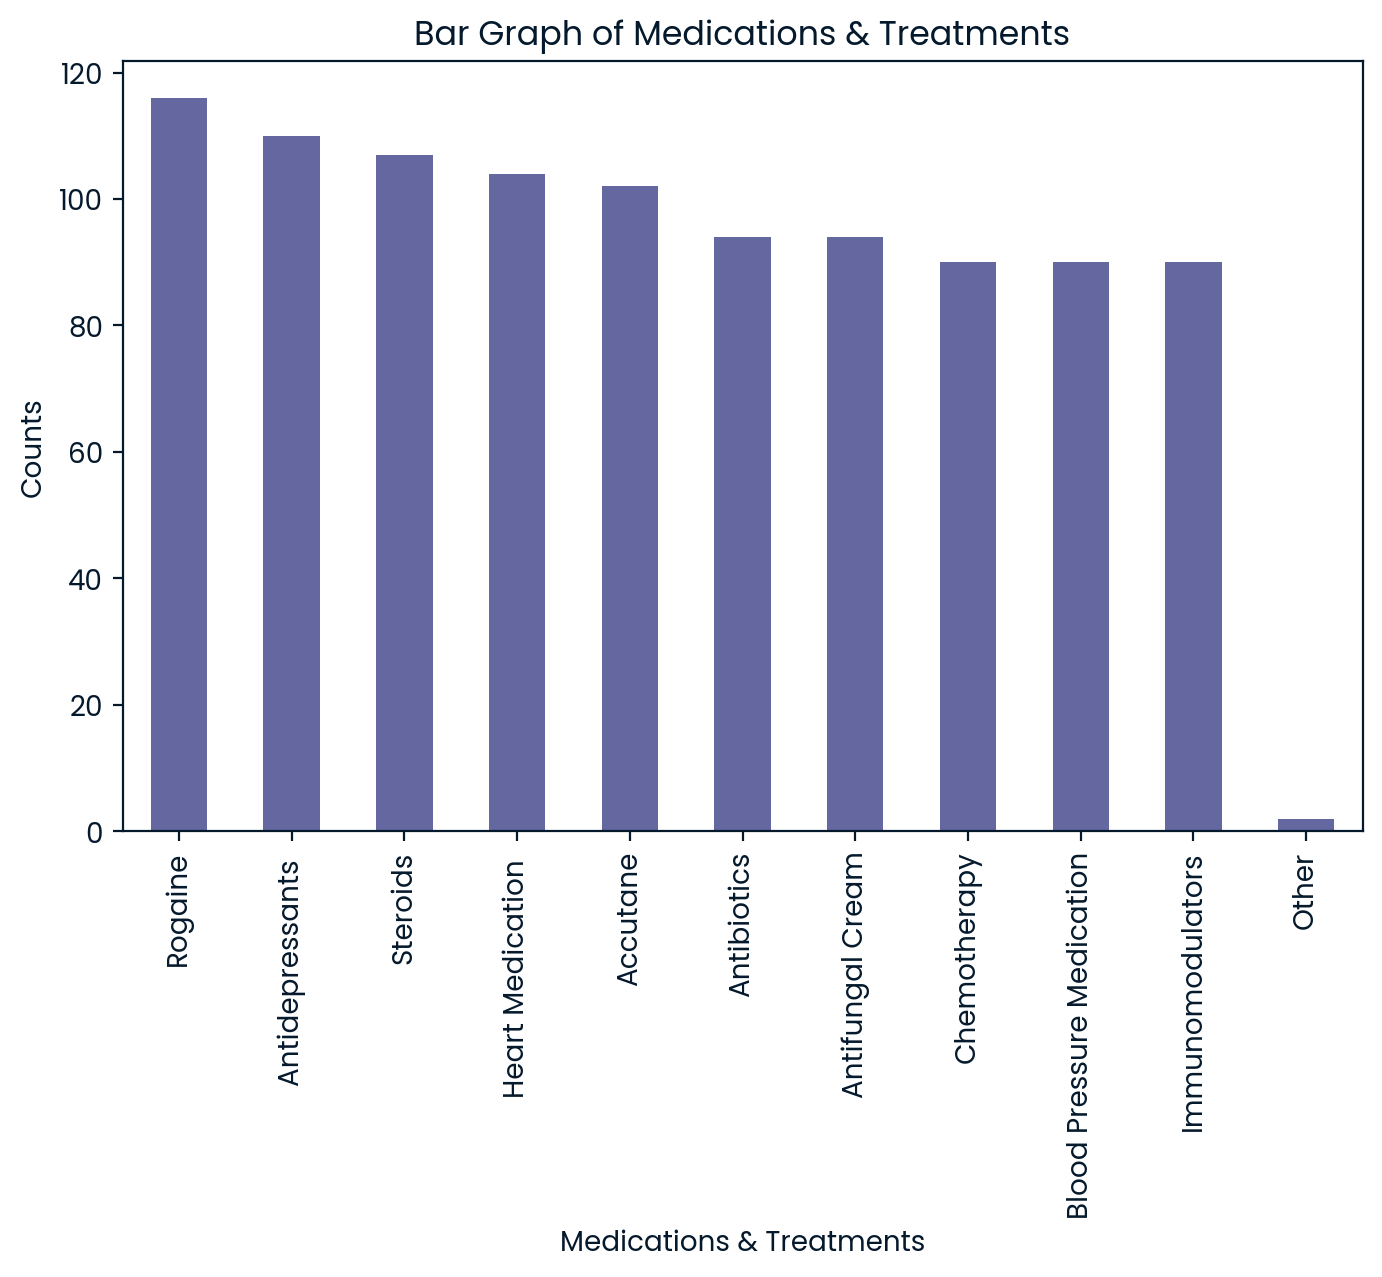

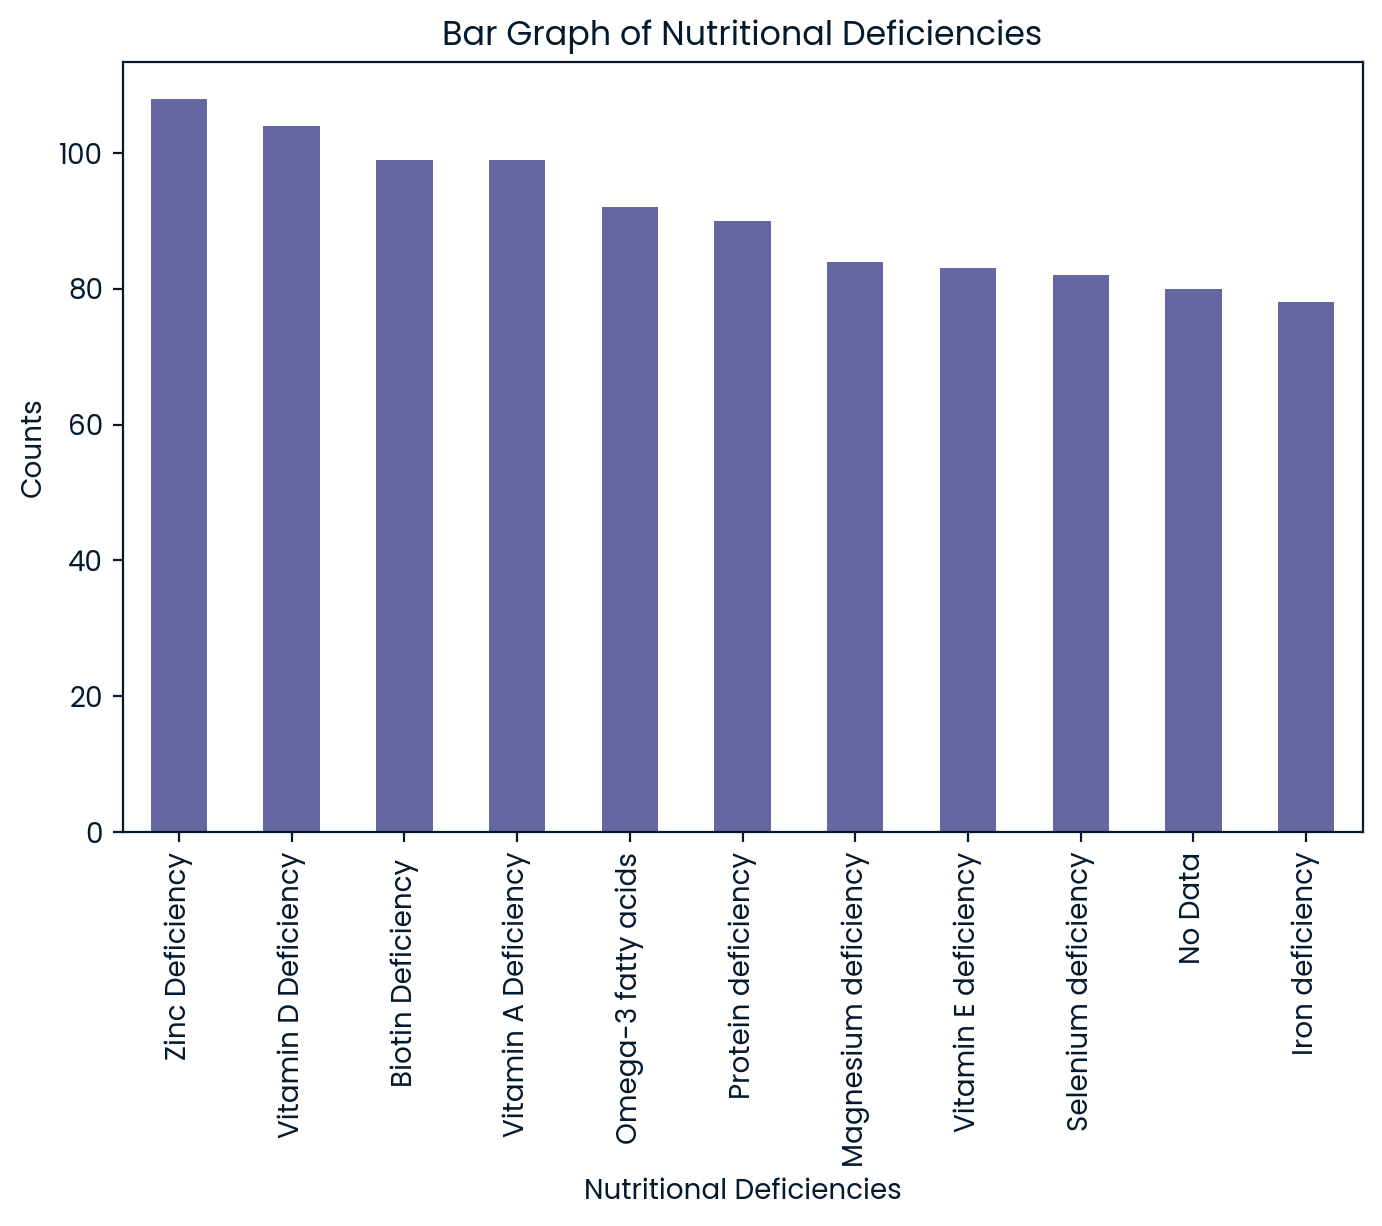

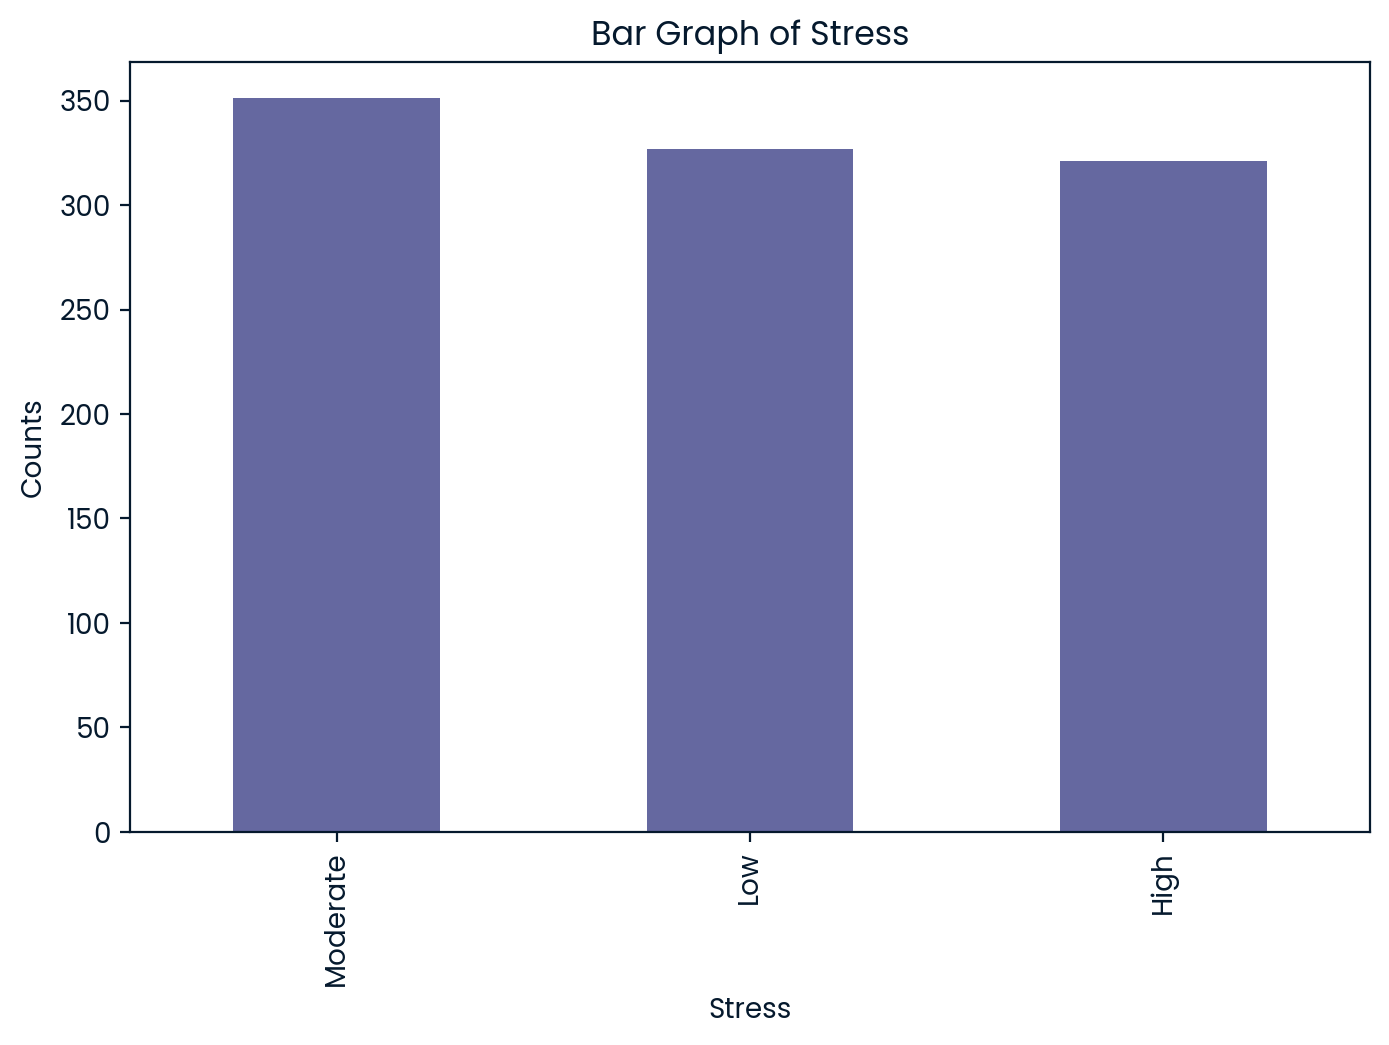

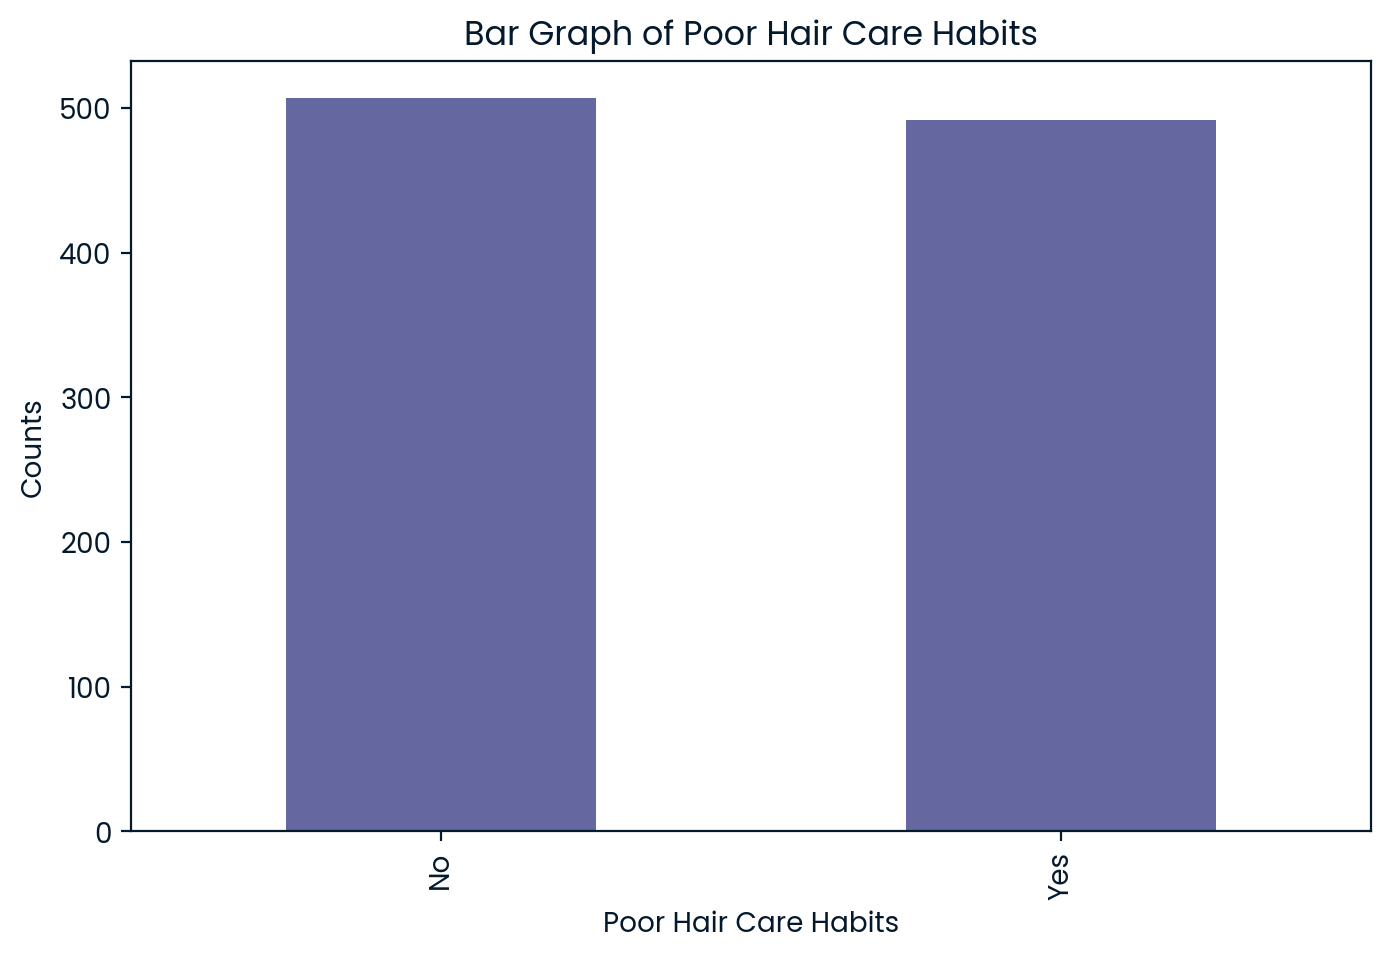

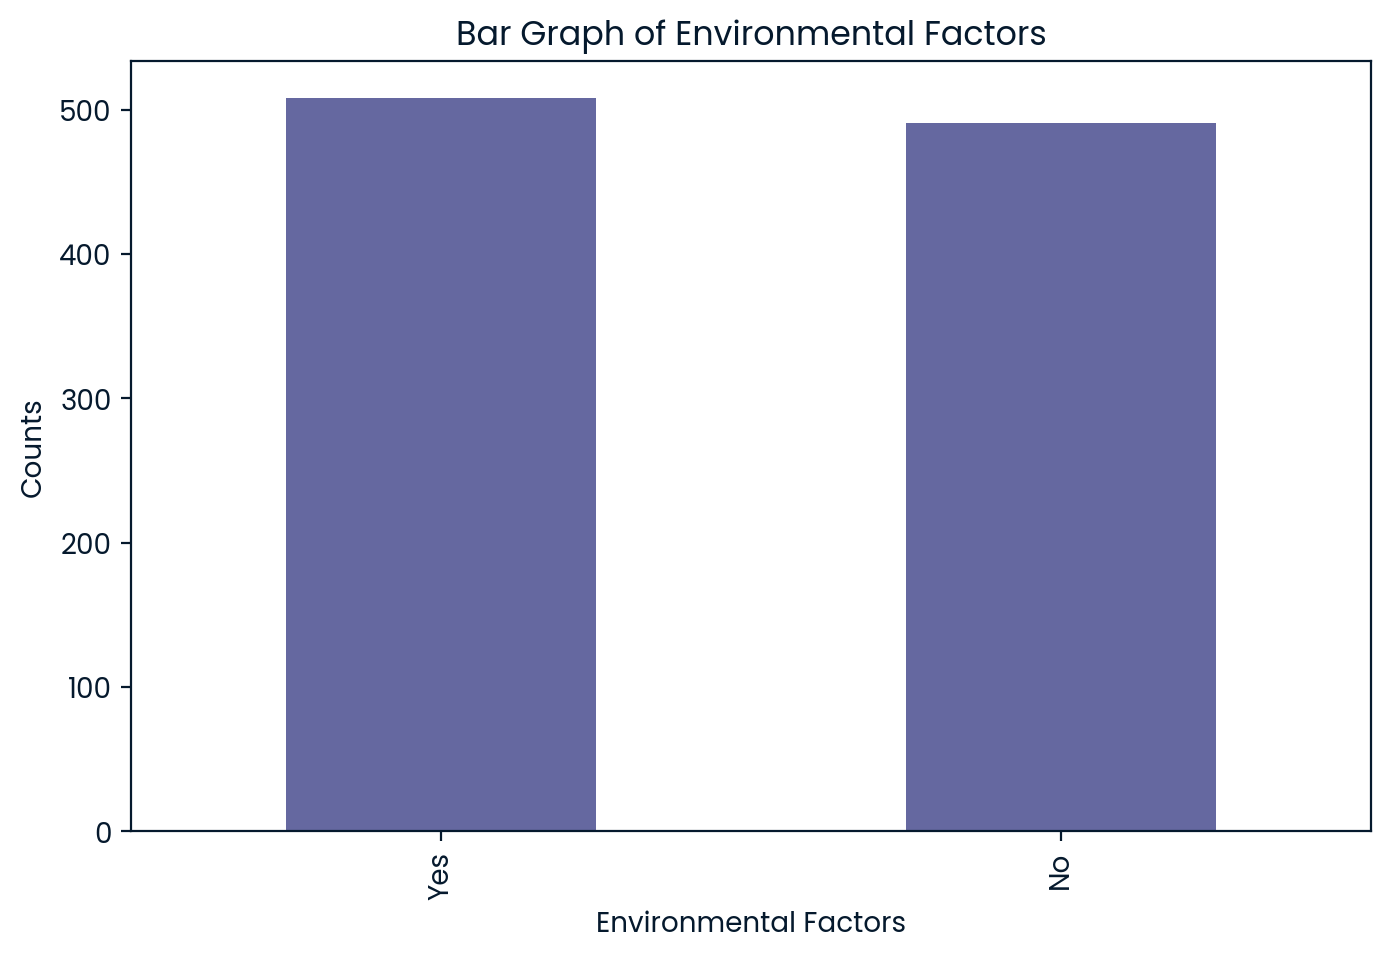

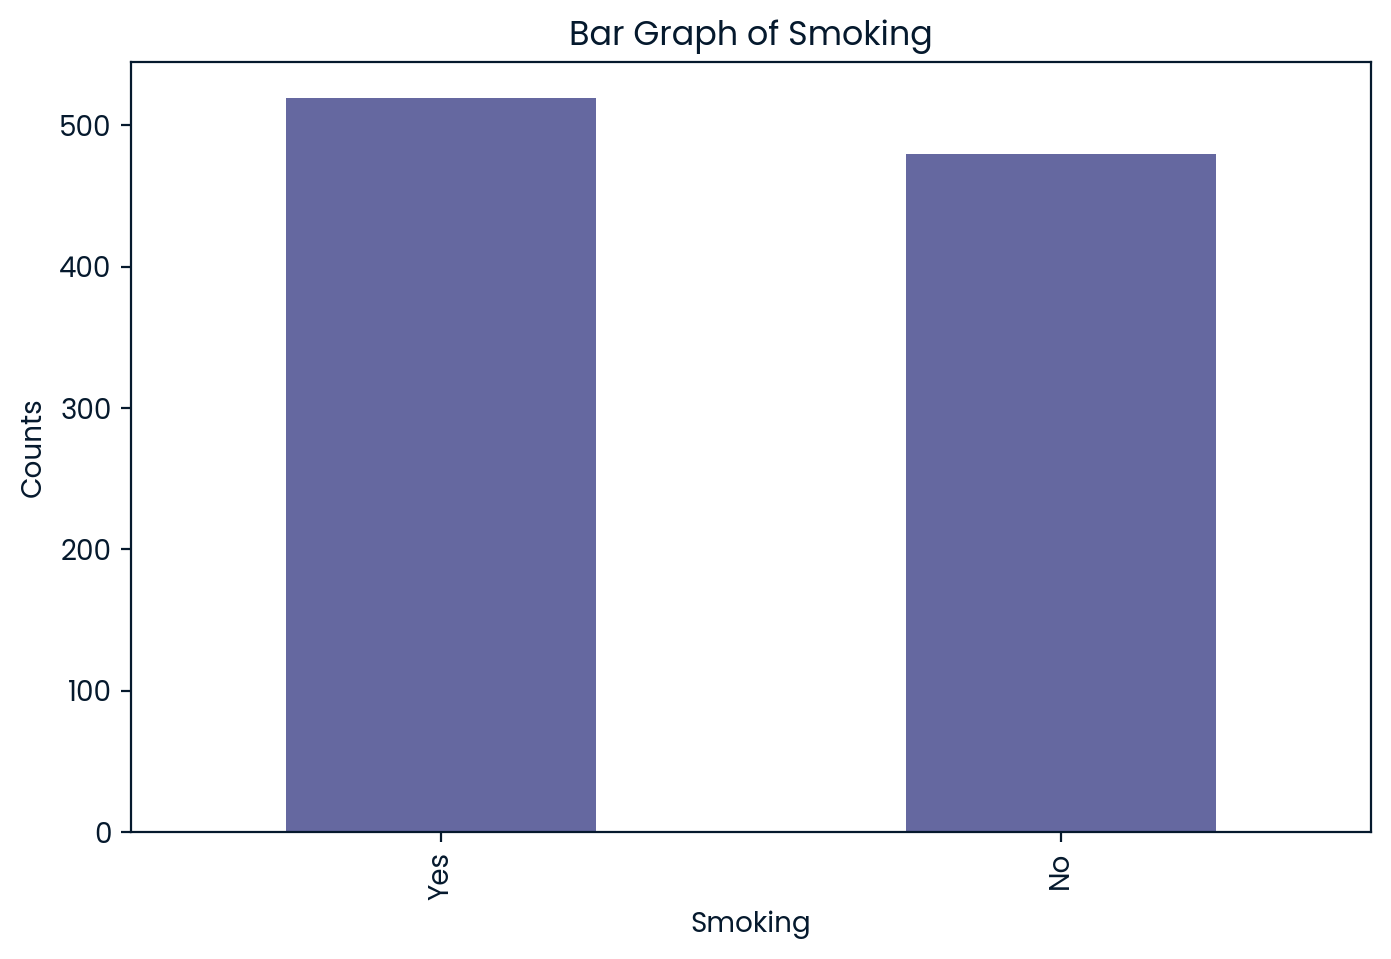

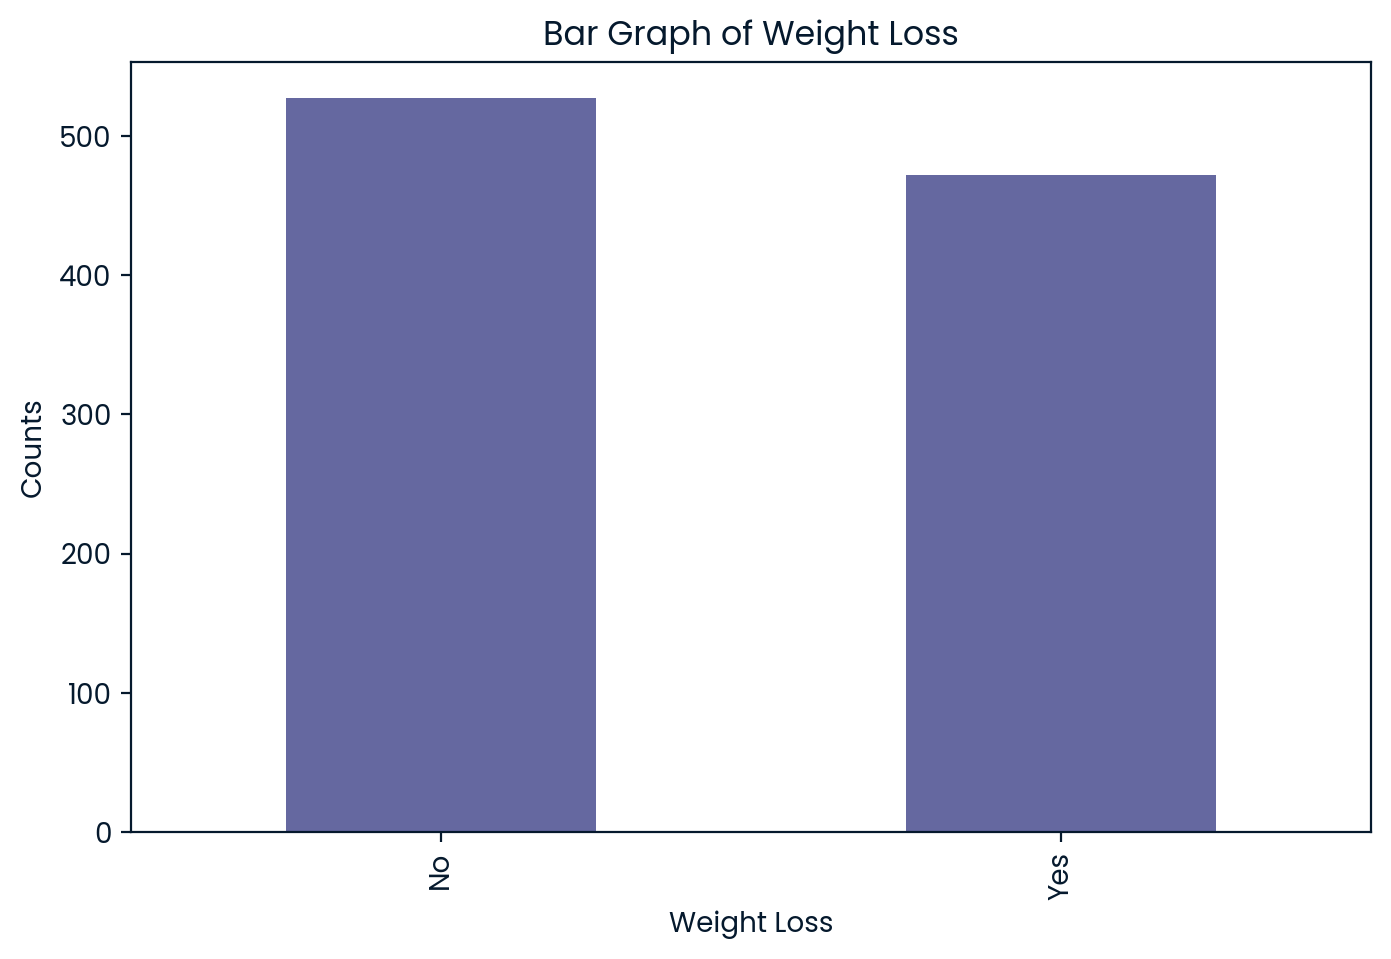

In [106]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

#plot the categorical columns
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar graphs for each categorical column
for col in categorical_columns:
    # Count the occurrences of each category
    counts = data[col].value_counts()
    
    # Create the bar graph
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar')
    
    # Adding labels and title
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f'Bar Graph of {col}')
    
    # Display the bar graph
    plt.show()

All features(variables) have similar proportion of each values. However, `Medications and Treatments` column has 'Other' category with low frequency count. Other than that, everything else seems okay.

With such a low count, it's is better if that values can be replaced with NA instead. Chaning to NA removes it during analysis and that helps avoid disproportionate data.

In [107]:
# Replace 'Other' from 'Medications and Treatment' columns to NA
data['Medications & Treatments'] = data['Medications & Treatments'].replace('Other', pd.NA)

# Check if value has changed
data['Medications & Treatments'].unique()

array([<NA>, 'Antibiotics', 'Antifungal Cream', 'Accutane',
       'Chemotherapy', 'Steroids', 'Rogaine', 'Blood Pressure Medication',
       'Immunomodulators', 'Antidepressants ', 'Heart Medication '],
      dtype=object)

## Analysis
**Cluster Analysis Using Euclidean Distance**:
 Identifying these groups early allows for more tailored analyses, potentially leading to better insights. Here, I am attempting to determine whether there are distinct age groups represented in the data.


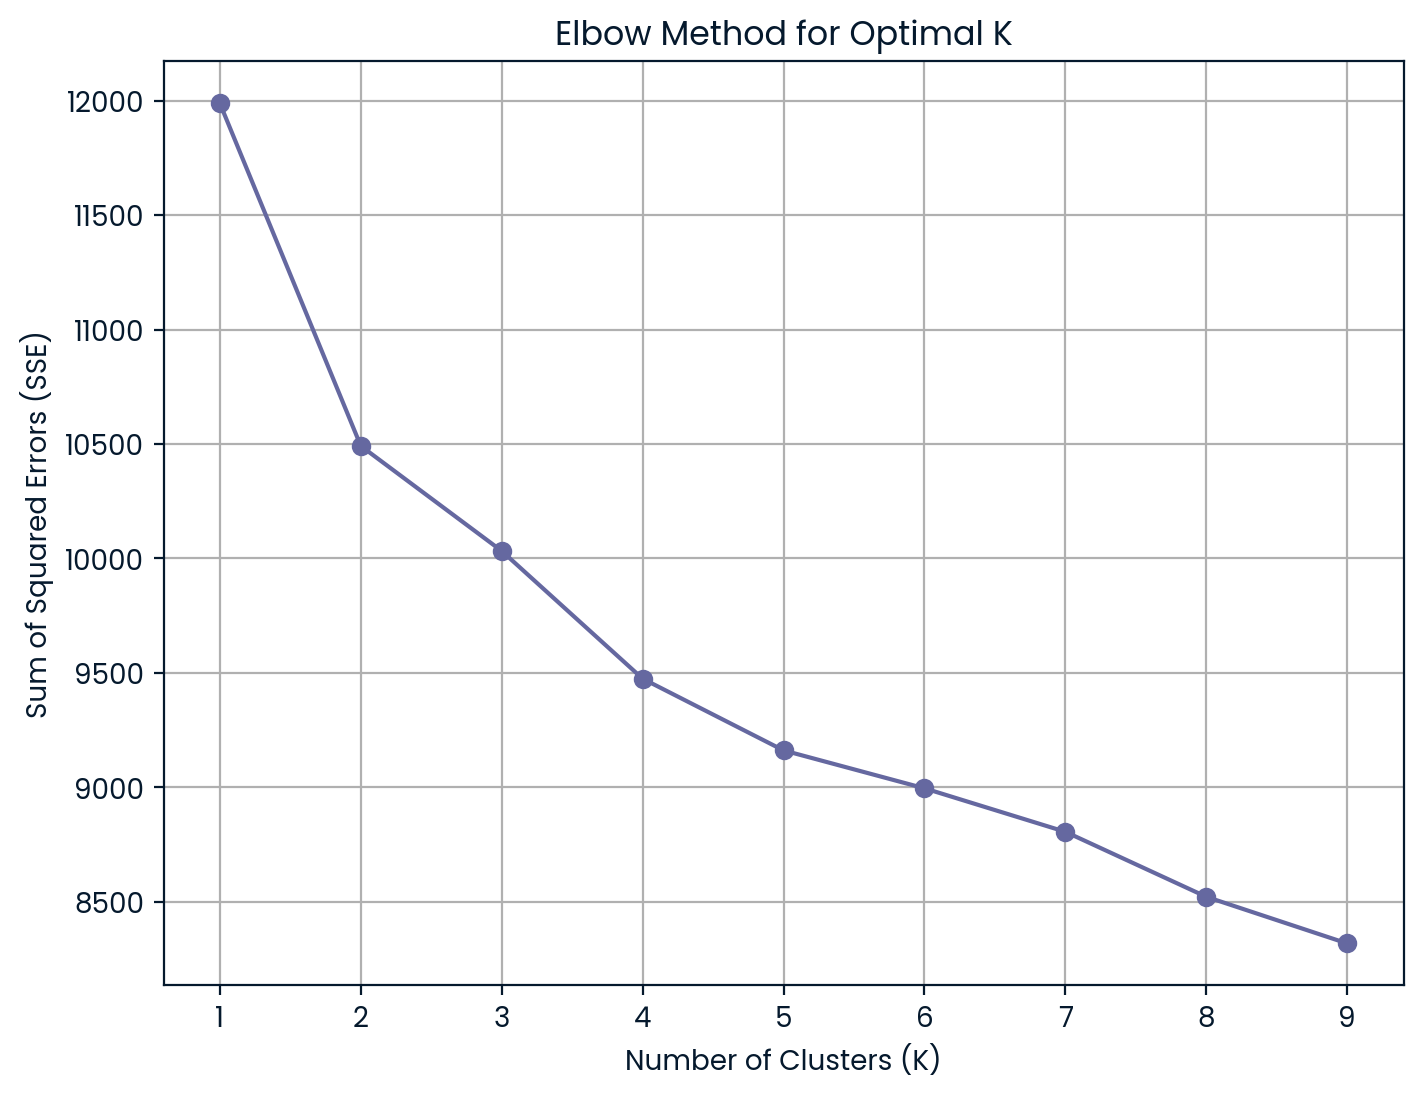

In [108]:
# List of categorical columns to encode
categorical_columns = ['Hormonal Changes', 'Medical Conditions', 'Medications & Treatments',
                       'Nutritional Deficiencies', 'Stress', 'Poor Hair Care Habits', 
                       'Environmental Factors', 'Smoking', 'Weight Loss', 'Genetics']

# Copy of the original data to avoid modifying it directly
data_numeric = data.copy()

# Handle missing values in categorical columns (fill with a placeholder)
data_numeric[categorical_columns] = data_numeric[categorical_columns].fillna('Unknown')

# Encode categorical columns as numeric
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_numeric[col] = le.fit_transform(data_numeric[col])
    label_encoders[col] = le  # Store the encoder if you want to decode later

# Exclude 'Id' from clustering and include 'Age'
features = ['Age'] + [col for col in data_numeric.columns if col not in ['Id', 'Hair Loss']]
X = data_numeric[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()


Though most models always show steep change from moving from one cluster to two, I will consider the two cluster in this data as statistically significant group. Since this is age data, it is insignificant to clasify the age group into multiple segments.

In [109]:
# Fit KMeans with the optimal number of clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data_numeric['Cluster'] = kmeans.fit_predict(X_scaled)

In [110]:
# Step 1: Cross-tabulation of clusters and hair loss status
cluster_hair_loss = pd.crosstab(data_numeric['Cluster'], data_numeric['Hair Loss'], margins=True)
cluster_hair_loss.columns = ['No Hair Loss', 'Hair Loss', 'Total']

# Step 2: Calculate percentages of hair loss within each cluster
cluster_hair_loss['% Hair Loss'] = (cluster_hair_loss['Hair Loss'] / cluster_hair_loss['Total']) * 100

# Step 3: Calculate average age per cluster
average_age = data_numeric.groupby('Cluster')['Age'].mean()
average_age = average_age.rename("Average Age")

# Step 4: Combine average age with the cross-tabulation results
cluster_hair_loss = cluster_hair_loss.join(average_age)

# Step 10: Formatting the DataFrame for better readability
cluster_hair_loss = cluster_hair_loss.style.format({
    'No Hair Loss': '{:.0f}',
    'Hair Loss': '{:.0f}',
    'Total': '{:.0f}',
    '% Hair Loss': '{:.2f}%',
    'Average Age': '{:.2f}'
})

# Step 11: Highlight the row with index 5
def highlight_row(row):
    return ['background-color: yellow' if row.name == 4 else '' for _ in row]

# Apply highlighting to the DataFrame by row
cluster_hair_loss = cluster_hair_loss.apply(highlight_row, axis=1)

# Display the final formatted results
cluster_hair_loss


,No Hair Loss,Hair Loss,Total,% Hair Loss,Average Age
Cluster,,,,,
0,273,237,510,46.47%,42.03
1,229,260,489,53.17%,26.01
All,502,497,999,49.75%,nan


Based on the cluster result, each cluster has an average age at 42.03% and 25.88% respectively. Interestingly, the younger cluster group has higher percentage hair loss than older age group. But, is that statistically significant ? 

In [111]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Separate data by cluster
group_0 = data_numeric[data_numeric['Cluster'] == 0]
group_1 = data_numeric[data_numeric['Cluster'] == 1]

# Count the number of smokers in each group
count_smokers_0 = group_0['Smoking'].sum()
count_smokers_1 = group_1['Smoking'].sum()

# Total number of observations in each group
nobs_0 = len(group_0)
nobs_1 = len(group_1)

# Perform a two-sample z-test for proportions
count = [count_smokers_0, count_smokers_1]
nobs = [nobs_0, nobs_1]
stat, p_value = proportions_ztest(count, nobs)

# Output the test statistic and p-value
print(f"Z-test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in smoking proportions between the two clusters is statistically significant.")
else:
    print("The difference in smoking proportions between the two clusters is not statistically significant.")


Z-test statistic: -0.24765161939317928
P-value: 0.8044039679902345
The difference in smoking proportions between the two clusters is not statistically significant.


Even though there is a noticeable 5% difference in smoking proportions between the two groups, the p-value indicates that this difference is not statistically significant. This suggests that any observed difference in smoking habits between the two age groups could be due to random chance. In simpler terms, both age groups appear to have similar smoking habits.

In [112]:
# Add the cluster column in the main data
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [113]:
# Categorical columns changed to numeric values
final_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

The dataset represents two major clusters,so I segement the data into two distinct groups and will run random forest classifier for each.

In [114]:
# Create two separate datasets group for separate analysis
cluster_0_data = final_data[final_data['Cluster'] == 0]
cluster_1_data = final_data[final_data['Cluster'] == 1]


In [115]:
# Separate features and target variable
data_final = cluster_0_data.copy()
data_final = data_final.drop('Cluster', axis=1)


X = data_final.drop(columns=['Hair Loss', 'Id'])  # Drop 'Hair Loss' and 'Id'
y = data_final['Hair Loss']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Create a pipeline that includes the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.4803921568627451

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.71      0.58        51
           1       0.46      0.25      0.33        51

    accuracy                           0.48       102
   macro avg       0.48      0.48      0.45       102
weighted avg       0.48      0.48      0.45       102



Accuracy of the higher age cluster group for base model is 48%.
This number might improve if hyper-parameters are tuned. I use random search method and tune each hyperparameters on range of values.

In [116]:
def manual_random_search(data, test_size=0.2, random_state=42, n_iter=10):
    # Separate features and target variable
    X = data.drop(columns=['Hair Loss', 'Id'])  # Adjust 'Hair Loss' and 'Id' as per your dataset
    y = data['Hair Loss']
    
    # Split the dataset into training + validation and test sets
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Further split the temporary dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, 
                                                      test_size=0.5, 
                                                      random_state=random_state)
    
    best_params = None
    best_val_accuracy = 0
    test_accuracy = 0

    for _ in range(n_iter):
        # Randomly sample parameters
        sampled_params = {
            'n_estimators': random.randint(100, 1200),  # Sampled directly
            'max_depth': random.randint(1, 90),         # Sampled directly
            'max_features': random.choice(['sqrt', 'log2', None]),  # Categorical options
            'min_samples_split': random.choice([2, 5, 10]),
            'min_samples_leaf': random.choice([1, 3, 4])
        }
        
        # Create the classifier with sampled parameters
        classifier = RandomForestClassifier(**sampled_params, random_state=random_state)
        
        # Train the model on the training set
        classifier.fit(X_train, y_train)
        
        # Evaluate on the validation set
        val_accuracy = accuracy_score(y_val, classifier.predict(X_val))
        
        # Update the best parameters if this model is better
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_params = sampled_params
            best_model = classifier  # Store the best model
            # Evaluate the best model on the test set
            test_accuracy = accuracy_score(y_test, classifier.predict(X_test))

    print("Best Hyperparameters:", best_params)
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
    print(f"Test Accuracy of Best Model: {test_accuracy:.4f}")
    print(f"Best model: {best_model}")
    return best_params, best_val_accuracy, test_accuracy, best_model




In [117]:
# Call your manual_random_search function with data_final
best_params, best_val_score, test_accuracy, best_model = manual_random_search(
    data_final, n_iter=30)

Best Hyperparameters: {'n_estimators': 817, 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 5, 'min_samples_leaf': 4}
Best Validation Accuracy: 0.5441
Test Accuracy of Best Model: 0.5980
Best model: RandomForestClassifier(max_depth=3, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=817, random_state=42)


The model improved by some factor. The parameters can now be tested on how much each of them are influencing for hair loss. The variable importance method in random forest method can be used for that. Note: the VIP outputs is based on correlation and not on causation. This means even though the model might say age is the most important factor, but that might be false in real world as confounders exists in real world.

In [118]:
# Plot Feature Importances
# Extract feature importances from the best model
feature_importances = best_model.feature_importances_

# Since all columns are already boolean, we can directly use the original feature names from X_train
all_feature_names = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Optional: Print the DataFrame for a tabular view of feature importances
print("\nFeature Importances:\n", importance_df)



Feature Importances:
                                               Feature  Importance
0                                                 Age    0.141774
36                                    Weight Loss_Yes    0.050558
19                   Medications & Treatments_Rogaine    0.048926
32                                    Stress_Moderate    0.048637
37                                       Genetics_Yes    0.048106
11                Medical Conditions_Thyroid Problems    0.043378
30           Nutritional Deficiencies_Zinc Deficiency    0.036325
1                                Hormonal Changes_Yes    0.035764
24       Nutritional Deficiencies_Omega-3 fatty acids    0.035371
10           Medical Conditions_Seborrheic Dermatitis    0.034451
12               Medications & Treatments_Antibiotics    0.032147
35                                        Smoking_Yes    0.029123
16              Medications & Treatments_Chemotherapy    0.026232
4                       Medical Conditions_Dermatosis

The plot below shows an overview of how each of variables in the datasets influenced the hair loss. The graph below is more succinict and easier version to interpret.

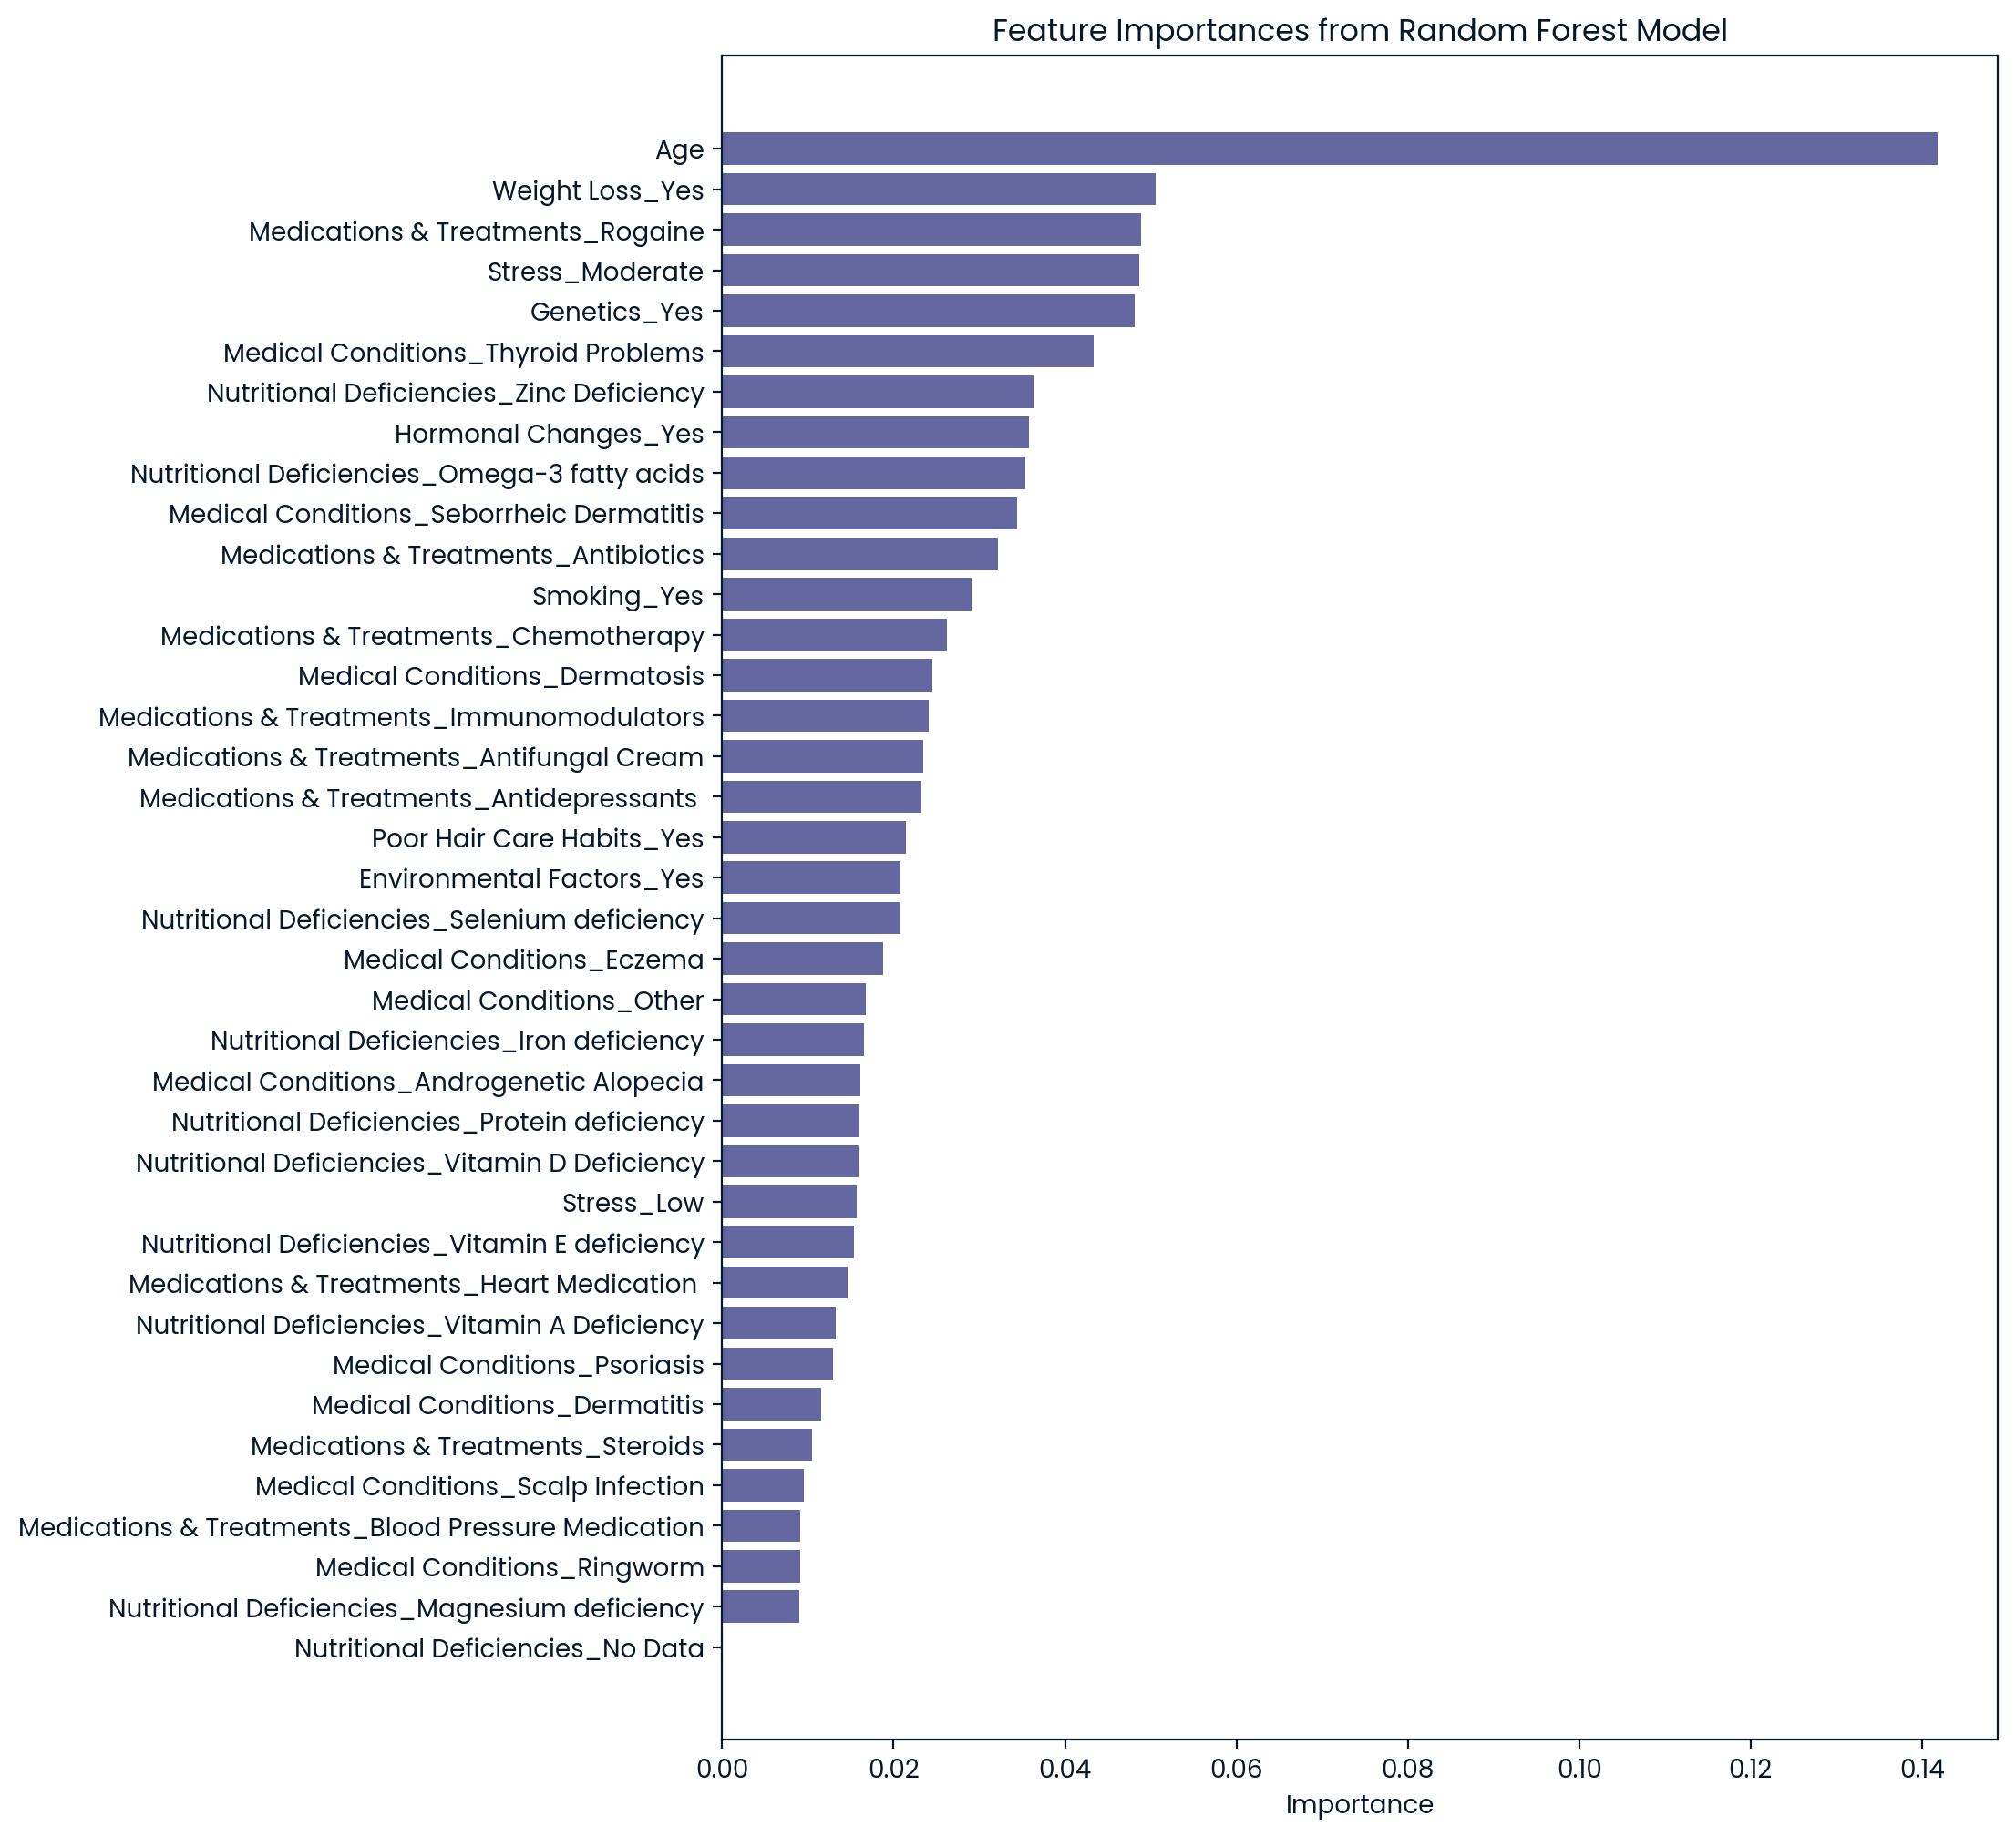

In [119]:
# Plotting feature importances with highlighted bars
plt.figure(figsize=(10, 12))  # Increase the height to 12

# Create the horizontal bar plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.yticks(fontsize=10)  # Change the fontsize of y-ticks to improve spacing
plt.subplots_adjust(left=0.2)  # Adjust the left margin for better visibility if needed
plt.show()


Based on the Variable importance method, it is clear the age and stress largely influence on whether a person has hair loss. But,  by the factor of how much ? If the person smokes cigarates, the probability of hair fall increases by how many times ? This can be explored with statistical inference methods.

In [120]:
from scipy.stats import chi2_contingency

# Ensure there are no missing values in the relevant columns
data = data_final.dropna(subset=['Genetics_Yes', 'Hair Loss'])

# Step 3: Create a Contingency Table
contingency_table = pd.crosstab(data['Genetics_Yes'], data['Hair Loss'], margins=True)
print("Contingency Table:\n", contingency_table)

# Step 4: Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between smoking and hair loss.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between smoking and hair loss.")

Contingency Table:
 Hair Loss       0    1  All
Genetics_Yes               
False         141  110  251
True          132  127  259
All           273  237  510
Chi-Squared Statistic: 1.3909646429836942
P-value: 0.8457638751805289
Degrees of Freedom: 4
Expected Frequencies:
 [[134.35882353 116.64117647 251.        ]
 [138.64117647 120.35882353 259.        ]
 [273.         237.         510.        ]]
Fail to reject the null hypothesis: There is no significant association between smoking and hair loss.


Baed on chi squared test, the p value is not significant. This means there is no causation between stress and hairloss. But, indeed there is correlation(not causation).

The steps below examine the same aspects for the second cluster, which represents individuals in the 25-year age group. Are the variables influencing both younger and older individuals the same?

In [121]:
# Analysis for CLUSTER GROUP 

# Separate features and target variable
data_final = cluster_1_data.copy()
data_final = data_final.drop('Cluster', axis=1)

X = data_final.drop(columns=['Hair Loss', 'Id'])  # Drop 'Hair Loss' and 'Id'
y = data_final['Hair Loss']

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the hyperparameters to tune for RandomForestClassifier
param_dist = {
    'classifier__n_estimators': np.arange(500, 1500, 100),  # Number of trees
    'classifier__max_depth': [10, 20, 30, None],  # Max depth of trees
    'classifier__max_features': ['sqrt', 'log2', 0.5],  # Features to consider when splitting
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 3]  # Minimum samples required to be at a leaf node
}

# Create a pipeline that includes a classifier
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42, verbose=2)

# Run random search on the training data
random_search.fit(X_train, y_train)

# Best parameters from random search
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the tuned model using the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Print accuracy and report on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:\n", val_report)

# Now evaluate the final model using the test set
y_test_pred = best_model.predict(X_test)

# Print accuracy and report on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)
print("\nTest Classification Report:\n", test_report)

# Extract feature importances from the best model
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Since all columns are already boolean, we can directly use the original feature names from X_train
all_feature_names = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Optional: Print the DataFrame for a tabular view of feature importances
print("\nFeature Importances:\n", importance_df)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__max_depth=20, classifier__max_features=log2, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=800; total time=   1.0s
[CV] END classifier__max_depth=20, classifier__max_features=log2, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=800; total time=   0.9s
[CV] END classifier__max_depth=20, classifier__max_features=log2, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=800; total time=   1.0s
[CV] END classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1300; total time=   1.7s
[CV] END classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1300; total time=   1.7s
[CV] END classifier__max_depth=30, c

The age group of 25 has smoking and enviornmental factor as the most important variable for predicting hair loss. But is that actaully causing it ? or is it just a correlation ?

In [122]:
# Ensure there are no missing values in the relevant columns
data = data_final.dropna(subset=['Weight Loss_Yes', 'Hair Loss'])

# Step 3: Create a Contingency Table
contingency_table = pd.crosstab(data['Weight Loss_Yes'], data['Hair Loss'], margins=True)
print("Contingency Table:\n", contingency_table)

# Step 4: Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between weight loss and hair loss.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between weight loss and hair loss")


Contingency Table:
 Hair Loss          0    1  All
Weight Loss_Yes               
False            128  134  262
True             101  126  227
All              229  260  489
Chi-Squared Statistic: 0.9292077509553032
P-value: 0.9203336038961815
Degrees of Freedom: 4
Expected Frequencies:
 [[122.69529652 139.30470348 262.        ]
 [106.30470348 120.69529652 227.        ]
 [229.         260.         489.        ]]
Fail to reject the null hypothesis: There is no significant association between weight loss and hair loss


The answer is "It's just a correlation". I need more detailed analysis to see if Genetic factor and Envionmental factor are actually causing hair-loss. 